<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the fuel consumption (L/100k) rate for the diesel car? CHANGE!!!!!</h3>


<h3>Import data</h3>
<p>
You can find the "APEBUSD Dataset" from the following link: <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/APEBUSD_trades_1m.csv">https://1824251045.rsc.cdn77.org/web/algohouse/data/APEBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [ ]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [66]:
import pandas as pd
import numpy as np

This function will download the dataset into your browser


In [ ]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())



<h2>Reading the dataset from the URL</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/APEBUSD_trades_1m.csv">HERE</a> for free storage.


In [2]:
filename = "https://1824251045.rsc.cdn77.org/web/algohouse/data/APEBUSD_trades_1m.csv"

you will need to download the dataset; if you are running locally, please comment out the following


In [3]:
await download(filename, "APEBUSD_trades_1m.csv")
filename = "APEBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [67]:
def spoil_df(df, p=0.1):
    x = np.random.randint(0, df.shape[0], int(df.shape[0]*df.shape[1]*p)).reshape(-1, 1)
    y = np.random.randint(1, df.shape[1], int(df.shape[0]*df.shape[1]*p)).reshape(-1, 1)
    idx_to_replace = np.concatenate((x, y), axis=1)
    df_np = df.to_numpy()
    for (x, y) in idx_to_replace:
        df_np[x,y] = "?"
    cols = ["open", "high", "low", "close", "volume", "rec_count", "avg_price"]
    dict_df = {}
    for i, col in enumerate(cols):
        dict_df[col] = df_np[:,i]
    spoiled_df = pd.DataFrame(dict_df)
    return spoiled_df

In [68]:
df = pd.read_csv(filename, index_col=0)
df = spoil_df(df, 0.1)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [69]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,3.096,3.096,3.076,3.077,2733.3,34
1,2022-11-11 14:39:00,3.073,3.077,3.064,3.065,5353.1,40
2,2022-11-11 14:40:00,3.068,3.075,?,3.075,5582.2,34
3,2022-11-11 14:41:00,3.075,3.091,3.069,3.085,10358.0,43
4,2022-11-11 14:42:00,3.085,3.093,3.074,3.074,?,38


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the APEBUSD dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [70]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,3.096,3.096,3.076,3.077,2733.3,34.0
1,2022-11-11 14:39:00,3.073,3.077,3.064,3.065,5353.1,40.0
2,2022-11-11 14:40:00,3.068,3.075,NaN,3.075,5582.2,34.0
3,2022-11-11 14:41:00,3.075,3.091,3.069,3.085,10358.0,43.0
4,2022-11-11 14:42:00,3.085,3.093,3.074,3.074,NaN,38.0


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [71]:
missing_data = df.isnull()
missing_data.head(5)

,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [72]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

open
False    66528
Name: open, dtype: int64

high
False    59409
True      7119
Name: high, dtype: int64

low
False    59426
True      7102
Name: low, dtype: int64

close
False    59382
True      7146
Name: close, dtype: int64

volume
False    59175
True      7353
Name: volume, dtype: int64

rec_count
False    59392
True      7136
Name: rec_count, dtype: int64

avg_price
False    59372
True      7156
Name: avg_price, dtype: int64



Based on the summary above, each column has 66528 rows of data and seven of the columns containing missing data:

<ol>
    <li>"open": ? missing data</li>
    <li>"high": ? missing data</li>
    <li>"low" : ? missing data</li>
    <li>"close": ? missing data</li>
    <li>"volume": ? missing data</li>
    <li>"rec_count": ? missing data</li>
    <li>"avg_price": ? missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"open": ? missing data, replace them with mean</li>
    <li>"high": ? missing data, replace them with mean</li>
    <li>"low": ? missing data, replace them with mean</li>
    <li>"close": ? missing data, replace them with mean</li>
    <li>"volume": ? missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"rec_count": ? missing data, replace them with ?. 
        <ul>
            <li>Reason: ?</li>
        </ul>
    </li>
</ul>

<b>Replace based on neighboring values:</b>

<ul>
    <li>"avg_price": ? missing data, replace based on neighboring values
        <ul>
            <li>Reason: ?</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "open" column </h4>


In [10]:
avg_open = df["open"].astype("float").mean(axis=0)
print("Average of open:", avg_open)

Average of open: 3.6028441147245154


<h4>Replace "NaN" with mean value in "open" column</h4>


In [11]:
df["open"].replace(np.nan, avg_open, inplace=True)

<h4>Calculate the mean value for the "high" column</h4>


In [12]:
avg_high = df["high"].astype("float").mean(axis=0)
print("Average of high:", avg_high)

Average of high: 3.6053455082243357


<h4>Replace "NaN" with the mean value in the "high" column</h4>


In [13]:
df["high"].replace(np.nan, avg_high, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "low" column with the mean value.</b>

</div>


In [42]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#Calculate the mean vaule for "low" column
avg_low = df["low"].astype("float").mean(axis=0)
print("Average of low:", avg_low)

# replace NaN by mean value in "low" column
df["low"].replace(np.nan, avg_low, inplace = True)
```

</details>


<h4>Calculate the mean value for the "close" column</h4>


In [14]:
avg_close = df["close"].astype("float").mean(axis=0)
print("Average close:", avg_close)

Average close: 3.6025502123070567


<h4>Replace "NaN" with the mean value in the "close" column</h4>


In [15]:
df["close"].replace(np.nan, avg_close, inplace=True)

<h4>Calculate the mean value for "volume" column</h4>


In [17]:
avg_volume = df["volume"].astype("float").mean(axis=0)
print("Average volume:", avg_volume)

Average volume: 5139.703475039951


<h4>Replace "NaN" with the mean value in the "volume" column</h4>


In [18]:
df["volume"].replace(np.nan, avg_volume, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [19]:
df["rec_count"].value_counts()

5.0      3654
6.0      3636
4.0      3451
7.0      3400
8.0      3391
         ... 
113.0       2
116.0       1
114.0       1
115.0       1
103.0       1
Name: rec_count, Length: 102, dtype: int64

We can see the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [20]:
freq_rec = df["rec_count"].value_counts().idxmax()

The replacement procedure is very similar to what we have seen previously:


In [21]:
#replace the missing 'num-of-doors' values by the most frequent 
df["rec_count"].replace(np.nan, freq_rec, inplace=True)

Finally, let's define function for replacing based on neighboring values:


In [22]:
def replace_avg_price(seriess):
    prev_value = None
    series = seriess.copy()
    i = 0
    j = 0
    while i != len(series):
        # print("in outter if, i=", i, "prev_value=", prev_value)
        if str(series[i]) == "nan":
            # print("in nan")
            if i == 0:
                while str(series[j+1]) != "nan":
                    j += 1
                    # print("j++, j=", j, sep="")
                series[i] = series[j+1]
                prev_value = series[i]
                j = i
                # print(f"set to {series[i]}")
            
            elif i == len(series)-1:
                series[i] = prev_value
                # print(f"set to {series[i]}")
            else:
                # print("Searching next")
                while str(series[j+1]) == "nan":
                    j += 1
                    # print("j++, j=", j, sep="")
                series[i] = (prev_value + series[j+1]) / 2
                # print(f"(prev_value + series[{j+1}]) / 2 = ({prev_value} + {series[j+1]} / 2 = {series[i]}")
                prev_value = series[i]
                j = i
                # print(f"set to {series[i]}")
        else:
            prev_value = series[i]
        i += 1
        j += 1
    return series

In [23]:
df["avg_price"] =  replace_avg_price(df["avg_price"])

In [24]:
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,3.602844,3.605346,3.076,3.07700,5139.703475,34.0,3.084732
1,2022-11-11 14:39:00,3.073000,3.077000,NaN,3.06500,5353.100000,40.0,3.069644
2,2022-11-11 14:40:00,3.068000,3.605346,3.062,3.07500,5139.703475,34.0,3.077019
3,2022-11-11 14:41:00,3.075000,3.091000,3.069,3.60255,10358.000000,43.0,3.084393
4,2022-11-11 14:42:00,3.085000,3.093000,3.074,3.07400,5139.703475,38.0,3.088095


In [25]:
df.isna().sum().sum()

7242

<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [26]:
df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count    float64
avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with timestamps have type 'datetime'. For example, 'open', 'high', 'low', 'close', 'avg_price' variables are numerical values that describe the price, so we should expect them to be of the type 'float'. 'rec_count' should have type 'int' because it describes quantity. 'ts' column should have type 'datetime'; however, that column is shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [27]:
df["ts"] = df["ts"].astype("datetime64[ns]")
df["rec_count"] = df["rec_count"].astype("int")

<h4>Let us list the columns after the conversion</h4>


In [28]:
df.dtypes

ts           datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
rec_count             int32
avg_price           float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform BUSD TO USDT:</p>
<p>In our dataset, "open", "high", "low", "close", "volume", "avg_price" are represented by BUSD (Binance USD) unit. However in most cases it is customary to use USDT.</p>
<p>We will need to apply <b>data transformation</b> to transform BUSD into USDT.</p>


<p>The price for the time of creating the notebook is:<p>
1 BUSD = 0.999707 USDT
<p>We can do many mathematical operations directly in Pandas.</p>


In [29]:
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,3.602844,3.605346,3.076,3.07700,5139.703475,34,3.084732
1,2022-11-11 14:39:00,3.073000,3.077000,NaN,3.06500,5353.100000,40,3.069644
2,2022-11-11 14:40:00,3.068000,3.605346,3.062,3.07500,5139.703475,34,3.077019
3,2022-11-11 14:41:00,3.075000,3.091000,3.069,3.60255,10358.000000,43,3.084393
4,2022-11-11 14:42:00,3.085000,3.093000,3.074,3.07400,5139.703475,38,3.088095


In [30]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
cols_to_convert = ["open", "high", "low", "close", "volume", "avg_price"]
for col in cols_to_convert:
    df[f"{col}_USDT"] = df[col] * 0.999707

# check your transformed data 
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT,avg_price_USDT
0,2022-11-11 14:38:00,3.602844,3.605346,3.076,3.07700,5139.703475,34,3.084732,3.601788,3.604289,3.075099,3.076098,5138.197542,3.083829
1,2022-11-11 14:39:00,3.073000,3.077000,NaN,3.06500,5353.100000,40,3.069644,3.072100,3.076098,NaN,3.064102,5351.531542,3.068745
2,2022-11-11 14:40:00,3.068000,3.605346,3.062,3.07500,5139.703475,34,3.077019,3.067101,3.604289,3.061103,3.074099,5138.197542,3.076117
3,2022-11-11 14:41:00,3.075000,3.091000,3.069,3.60255,10358.000000,43,3.084393,3.074099,3.090094,3.068101,3.601495,10354.965106,3.083489
4,2022-11-11 14:42:00,3.085000,3.093000,3.074,3.07400,5139.703475,38,3.088095,3.084096,3.092094,3.073099,3.073099,5138.197542,3.087190


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform "open" (price in BUSD) to EURO (1 BUSD = 0.92 EURO) and name the column "open_EURO".</b>

</div>


In [52]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# transform BUSD to EURO by mathematical operation ("open" multiplied by 0.92)
df["open_EURO"] = df["open"] * 0.92

df.head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "open", "close" and "avg_price".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [31]:
# replace (original value) by (original value)/(maximum value)
df["open_norm"] = df["open"] / df["open"].max()
df["close_norm"] = df["close"] / df["close"].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "avg_price".</b>

</div>


In [55]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df["avg_price_norm"] = df["avg_price"] / df["avg_price"].max() 

# show the scaled columns
df[["open_norm", "close_norm", "avg_price_norm"]].head()


```

</details>


Here we can see we've normalized "open", "close" and "avg_price" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "rec_count" is a real valued variable ranging from 1 to 119 and it has 101 unique values. What if we want to break it down into 3 bins and see which bin sold the most? Can we rearrange them into ten ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'rec_count' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Let's plot the histogram of rec_count to see what the distribution of rec_count looks like.


Text(0.5, 1.0, 'rec_count bins')

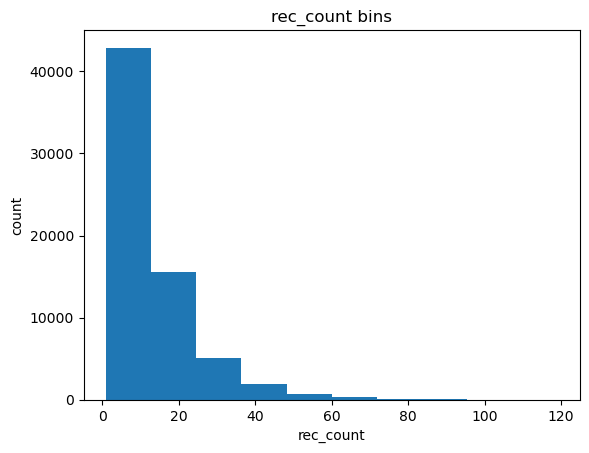

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["rec_count"])

# set x/y labels and plot title
plt.xlabel("rec_count")
plt.ylabel("count")
plt.title("rec_count bins")

<p>We would like 10 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [33]:
bins = np.linspace(min(df["rec_count"]), max(df["rec_count"]), 4)
bins

array([  1.        ,  40.33333333,  79.66666667, 119.        ])

We set group  names:


In [34]:
group_names = ["Low", "Medium", "High"]

We apply the function "cut" to determine what each value of `df["rec_count"]` belongs to.


In [35]:
df["rec_count-binned"] = pd.cut(df["rec_count"], bins, labels=group_names, include_lowest=True)
df[["rec_count", "rec_count-binned"]].head(20)

,rec_count,rec_count-binned
0,34,Low
1,40,Low
2,34,Low
3,43,Medium
4,38,Low
5,27,Low
6,5,Low
7,67,Medium
8,57,Medium
9,75,Medium


Let's see the "rec_count" in each bin:


In [36]:
df["rec_count-binned"].value_counts()

Low       64416
Medium     2040
High         72
Name: rec_count-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'rec_count bins')

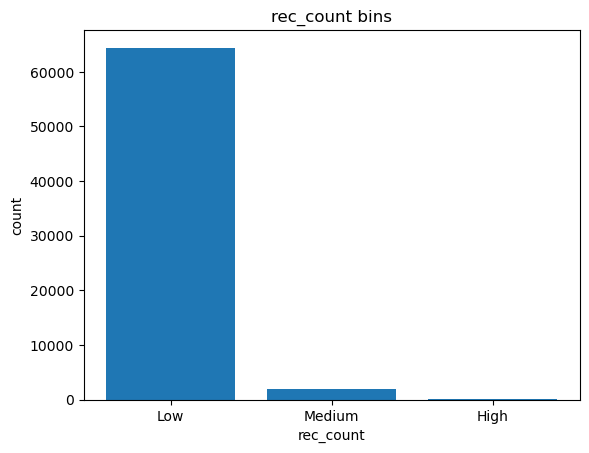

In [37]:
plt.bar(group_names, df["rec_count-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("rec_count")
plt.ylabel("count")
plt.title("rec_count bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High") ????????????. 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3! ???????????//
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'rec_count bins')

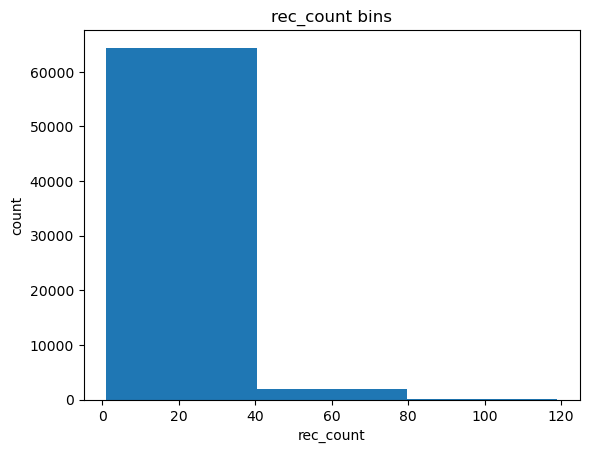

In [38]:
# draw historgram of attribute "rec_count" with bins = 3
plt.hist(df["rec_count"], bins = 3)

# set x/y labels and plot title
plt.xlabel("rec_count")
plt.ylabel("count")
plt.title("rec_count bins")

The plot above shows the binning result for the attribute "rec_count".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "rec_count-binned" has three unique values: "Low", "Medium" or "High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "rec_count-binned" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of rec_count. 
</p>


In [39]:
df.columns

Index(['ts', 'open', 'high', 'low', 'close', 'volume', 'rec_count',
       'avg_price', 'open_USDT', 'high_USDT', 'low_USDT', 'close_USDT',
       'volume_USDT', 'avg_price_USDT', 'open_norm', 'close_norm',
       'rec_count-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [40]:
dummy_variable_1 = pd.get_dummies(df["rec_count-binned"], prefix="rec_count")
dummy_variable_1.head()

,rec_count_Low,rec_count_Medium,rec_count_High
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [41]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "rec_count-binned" from "df"
df.drop("rec_count-binned", axis = 1, inplace=True)

In [42]:
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT,avg_price_USDT,open_norm,close_norm,rec_count_Low,rec_count_Medium,rec_count_High
0,2022-11-11 14:38:00,3.602844,3.605346,3.076,3.07700,5139.703475,34,3.084732,3.601788,3.604289,3.075099,3.076098,5138.197542,3.083829,0.802952,0.686677,1,0,0
1,2022-11-11 14:39:00,3.073000,3.077000,NaN,3.06500,5353.100000,40,3.069644,3.072100,3.076098,NaN,3.064102,5351.531542,3.068745,0.684867,0.683999,1,0,0
2,2022-11-11 14:40:00,3.068000,3.605346,3.062,3.07500,5139.703475,34,3.077019,3.067101,3.604289,3.061103,3.074099,5138.197542,3.076117,0.683753,0.686231,1,0,0
3,2022-11-11 14:41:00,3.075000,3.091000,3.069,3.60255,10358.000000,43,3.084393,3.074099,3.090094,3.068101,3.601495,10354.965106,3.083489,0.685313,0.803961,0,1,0
4,2022-11-11 14:42:00,3.085000,3.093000,3.074,3.07400,5139.703475,38,3.088095,3.084096,3.092094,3.073099,3.073099,5138.197542,3.087190,0.687542,0.686008,1,0,0


The last three columns are now the indicator variable representation of the rec_count variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "ts" (create df["ts_month"] = df["ts"].dt.month as category and then get_dummies from that column and then concatenate the df's)</b>

</div>


In [53]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Create a new columnb
df["ts_month"] = df["ts"].dt.month
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df["ts_month"], prefix="ts")
# show first 5 instances of data frame "dummy_variable_2"
dummy_variable_2.head()


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column "ts_month".</b>

</div>


In [56]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Concatenate df's
df = pd.concat([df, dummy_variable_2], axis=1)
# Drop original column "ts_month" from "df"
df.drop("ts_month", axis=1, inplace=True)


```

</details>


In [58]:
df.to_csv('clean_df.csv', index=False)

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE ???</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
